# Pairs Plots

## Outine
- What is a Pair plot
- Creating a Pair plot with Matplotlib
- Creating a Pair plot with Matplotlib and Pandas
- Wrapping up

  
 ### Definition of a Pair Plot 
   
A “pairs plot” is also known as a scatter matrix. A scatter matrix is a collection of scatterplots organized into a grid (or matrix). Each scatterplot shows the relationship between a pair of variables. Plots are just elaborations on this, showing all variables paired with all the other variables

<img src="images/seaborn-pairplot-1.png" width="300">


## Creating a Pair plot with Matplotlib

While **matplotlib** supports the scatter plot, it does not have a core function that represents a scatter plot matrix (a grid of scatter plots). Several more modern Python visualization libraries have an object that supports this. In the following example, we will show the creation of a function that will create a scatter plot matrix using native matplotlib funtions.


In [11]:
def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(8,8))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data[x], data[y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

    return fig


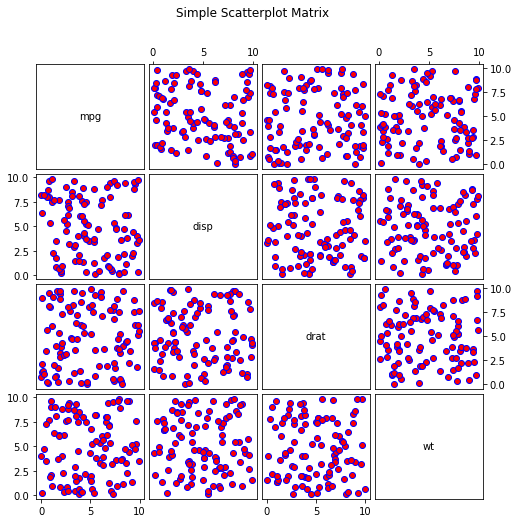

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import itertools # used for efficient iteration in the scatterplot_matrix function
# generate our random data
np.random.seed(1977)
numvars, numdata = 4, 100
data = 10 * np.random.random((numvars, numdata))
# create our display figure by calling our function that will also create 
# each of the subplot scatter plots - mfc= marker_face_color
fig = scatterplot_matrix(data, ['mpg', 'disp', 'drat', 'wt'],
        linestyle='none', marker='o', color='blue', mfc='red')
# Add a title
fig.suptitle('Simple Scatterplot Matrix')
# Show the scatterplot matrix
plt.show()

## Creating a Pair plot with Matplotlib and Pandas
For the ``Pairs Plot`` or ``Scatterplot matrix`` visual, using Matplotlib, while possible, was a bit cumbersome. In the following example, we will show how the **Pandas** function ``Scatter_matrix`` can be used to create a Pairs Plot with a single command.


<function matplotlib.pyplot.show(*args, **kw)>

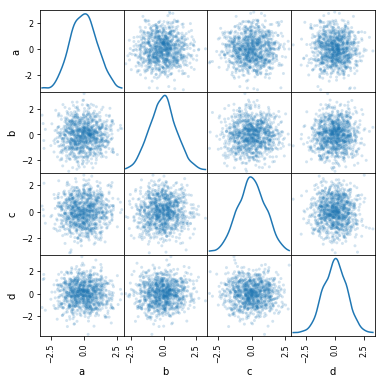

In [13]:
import pandas as pd
from pandas.plotting import scatter_matrix
# first, for our data, create a random data set
# creates an array of 1000 X 4 and fills it with random values as per standard normal distribution.
# assign column names a, b, c, d
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
# the diagonal is set to "Kernel Density Estimation"
scatter_matrix(df, alpha=0.2, figsize=(6,6), diagonal='kde')
# show the figure
plt.show


## Wrapping up
We covered:
- What is a Pair plot
- Creating a Pair plot with Matplotlib
- Creating a Pair plot with Matplotlib and Pandas

For more examples of pair plot plots, see the Matplotlib gallery or the Pandas library definition :

https://matplotlib.org/3.1.1/gallery/index.html

https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.plotting.scatter_matrix.html